In [1]:
from packaging import version

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import tensorboard as tb
import os
from tensorflow.python.summary.summary_iterator import summary_iterator
import tensorflow as tf

In [2]:
major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)
sns.set_theme(style="darkgrid")

TensorBoard version:  2.4.1


In [3]:
def read_data(path):
    filenames42 = os.listdir(path)
    data_list = []
    for filename in filenames42:
        data = []
        last_episode = None
        for summary in summary_iterator(os.path.join(path, filename)):
            if not last_episode or last_episode != summary.step:
                mean_reward = None
                frames = None
                loss = None
            for value in summary.summary.value:
                if value.tag == "MeanReward":
                    mean_reward = value.simple_value
                if value.tag == "Frames":
                    frames = int(value.simple_value)
                if value.tag == "Loss":
                    loss = value.simple_value
            if all([mean_reward, frames, loss]):
                data.append((int(summary.step), mean_reward, frames, loss))
            last_episode = summary.step
        data_list.extend(data)
    df = pd.DataFrame(data_list, columns=["Episode", "MeanReward", "Frames", "Loss"])
    df = df.sort_values(by=["Episode"], ignore_index=True)
    return df

In [4]:
df42 = read_data('models/exp42')
df42 = df42.drop([38, 41, 44, 83, 85, 126, 127, 154, 155, 156, 157, 158])
for i in range(df42.index.size):
    df42.iat[i, 0] = i + 1
df366 = read_data('models/exp366')
df366 = df366.drop([39, 41, 42, 83, 85, 125, 128, 152, 153, 154, 155, 156, 157, 158])
for i in range(df366.index.size):
    df366.iat[i, 0] = i + 1
df533 = read_data('models/exp533')
df533 = df533.drop([38, 41, 43, 82, 84, 125, 127])
df533 = df533.sort_values(by=["Frames"], ignore_index=True)
for i in range(df533.index.size):
    df533.iat[i, 0] = i + 1
df1337 = read_data('models/exp1337')
df1337 = df1337.drop([39, 41, 43, 45, 84, 85, 88, 127, 129, 133])
df1337 = df1337.sort_values(by=["Frames"], ignore_index=True)
for i in range(df1337.index.size):
    df1337.iat[i, 0] = i + 1

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


[Text(0.5, 1.0, 'Seed 1337')]

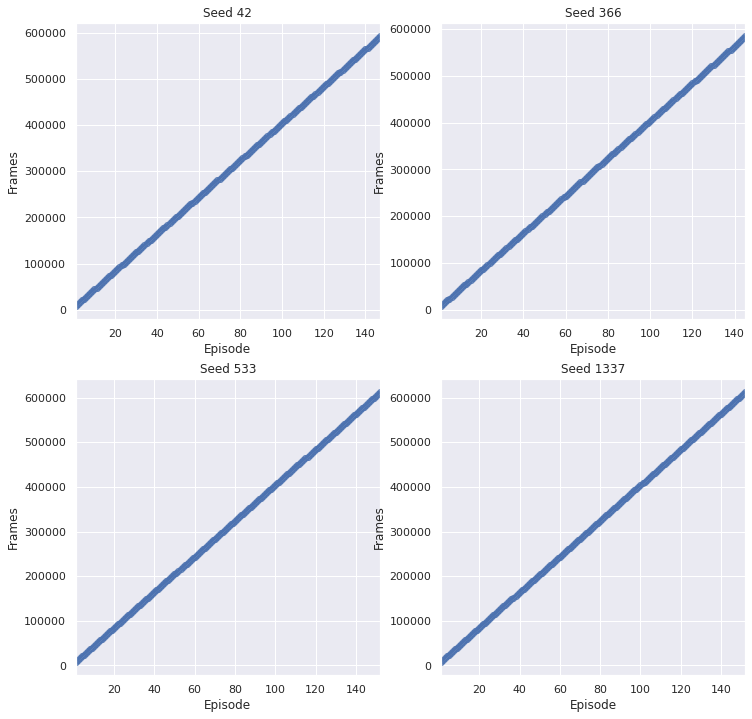

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))
sns.regplot(x="Episode", y="Frames", fit_reg=True, data=df42, ax=axs[0][0]).set(title="Seed 42")
sns.regplot(x="Episode", y="Frames", fit_reg=True, data=df366, ax=axs[0][1]).set(title="Seed 366")
sns.regplot(x="Episode", y="Frames", fit_reg=True, data=df533, ax=axs[1][0]).set(title="Seed 533")
sns.regplot(x="Episode", y="Frames", fit_reg=True, data=df1337, ax=axs[1][1]).set(title="Seed 1337")

[Text(0.5, 1.0, 'Seed 1337')]

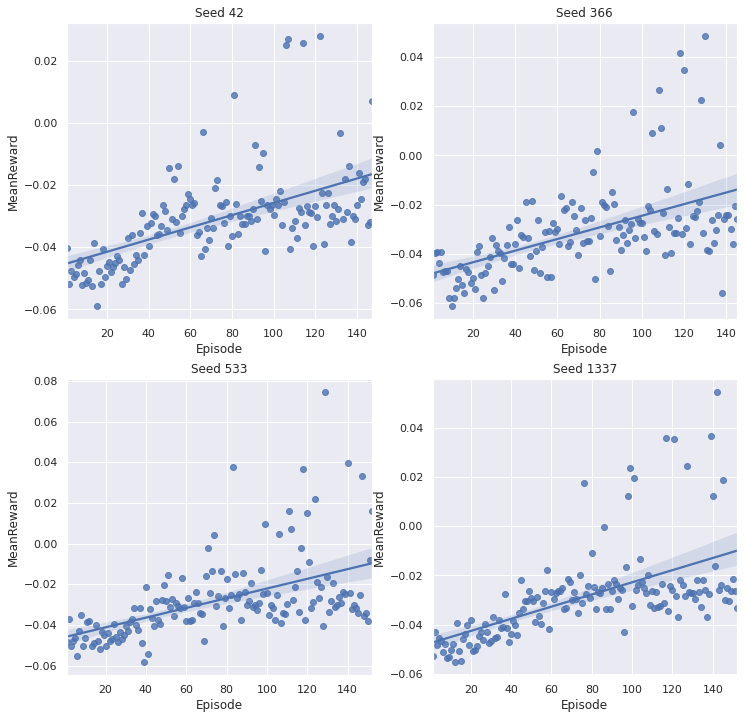

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))
sns.regplot(x="Episode", y="MeanReward", fit_reg=True, data=df42, ax=axs[0][0]).set(title="Seed 42")
sns.regplot(x="Episode", y="MeanReward", fit_reg=True, data=df366, ax=axs[0][1]).set(title="Seed 366")
sns.regplot(x="Episode", y="MeanReward", fit_reg=True, data=df533, ax=axs[1][0]).set(title="Seed 533")
sns.regplot(x="Episode", y="MeanReward", fit_reg=True, data=df1337, ax=axs[1][1]).set(title="Seed 1337")

[Text(0.5, 1.0, 'Seed 1337')]

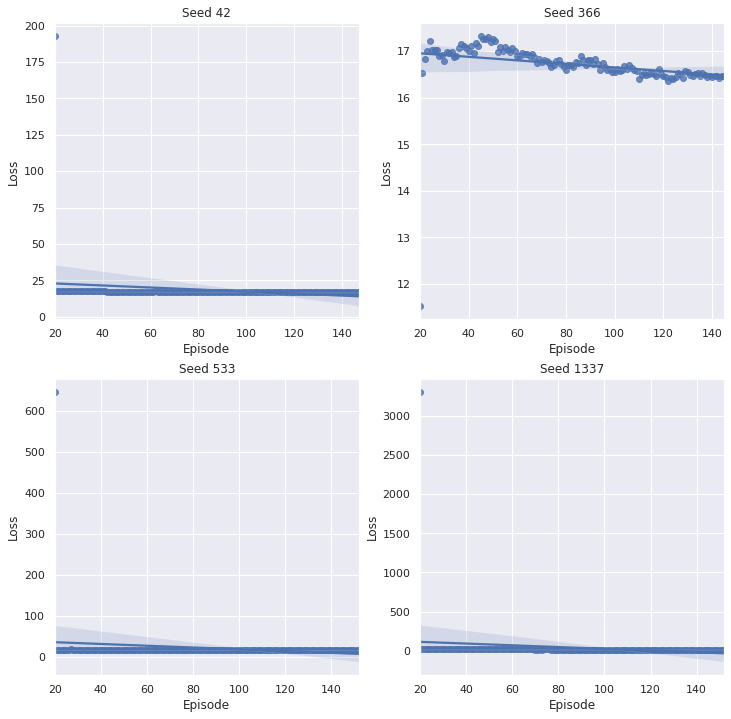

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))
sns.regplot(x="Episode", y="Loss", fit_reg=True, data=df42, ax=axs[0][0]).set(title="Seed 42")
sns.regplot(x="Episode", y="Loss", fit_reg=True, data=df366, ax=axs[0][1]).set(title="Seed 366")
sns.regplot(x="Episode", y="Loss", fit_reg=True, data=df533, ax=axs[1][0]).set(title="Seed 533")
sns.regplot(x="Episode", y="Loss", fit_reg=True, data=df1337, ax=axs[1][1]).set(title="Seed 1337")

[Text(0.5, 1.0, 'Seed 1337'), (0.0, 20.0)]

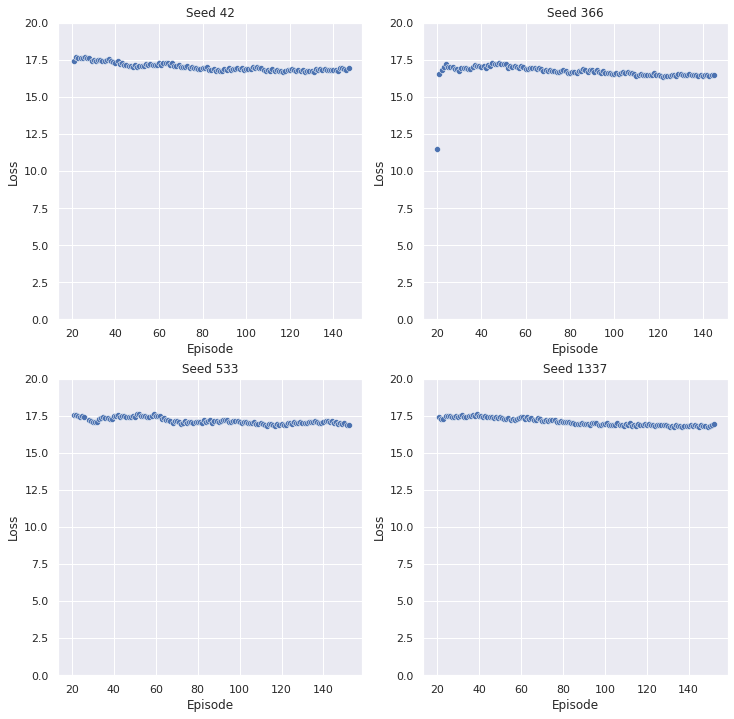

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))
sns.scatterplot(x="Episode", y="Loss", data=df42, ax=axs[0][0]).set(title="Seed 42", ylim=(0, 20))
sns.scatterplot(x="Episode", y="Loss", data=df366, ax=axs[0][1]).set(title="Seed 366", ylim=(0, 20))
sns.scatterplot(x="Episode", y="Loss", data=df533, ax=axs[1][0]).set(title="Seed 533", ylim=(0, 20))
sns.scatterplot(x="Episode", y="Loss", data=df1337, ax=axs[1][1]).set(title="Seed 1337", ylim=(0, 20))